# Часть 1: Зависимость от параметров распределений

In [1]:
import numpy as np
from scipy.stats import skewnorm, t
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

from utils import *

In [22]:
# Параметры
n = 100
k = 5
d = 1
M = 100
M_large = 5000
alpha_0 = 1
nu_0 = 3

In [3]:
alpha_values = np.linspace(-10, 10, 21)
nu_values = np.arange(1, 11)
Cknn_skew = []
Cknn_student = []
Tdist_skew = []
Tdist_student = []

In [4]:
from tqdm.notebook import tqdm

Cknn_skew = []
Tdist_skew = []
for alpha in tqdm(alpha_values, desc="Processing alpha values", position=0):
    Cknn_sum = 0
    Tdist_sum = 0
    for _ in tqdm(range(M), desc=f"Simulations for alpha={alpha}", leave=False, position=1):
        data = generate_skewnormal(n, alpha)
        G_knn = build_knn_graph(data, k)
        Cknn_sum += compute_number_of_components(G_knn)
        G_dist = build_distance_graph(data, d)
        Tdist_sum += clique_number(G_dist)
    Cknn_skew.append(Cknn_sum / M)
    Tdist_skew.append(Tdist_sum / M)

Processing alpha values:   0%|          | 0/21 [00:00<?, ?it/s]

Simulations for alpha=-10.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-9.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-8.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-7.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-6.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-5.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-4.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-3.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-2.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=-1.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=0.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=1.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=2.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=3.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=4.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=5.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=6.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=7.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=8.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=9.0:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for alpha=10.0:   0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
from tqdm.notebook import tqdm

Cknn_student = []
Tdist_student = []
for nu in tqdm(nu_values, desc="Processing nu values", position=0):
    Cknn_sum = 0
    Tdist_sum = 0

    for i in tqdm(range(M), desc=f"Simulations for nu={nu}", leave=False, position=1):
        data = generate_student_t(n, nu)
        G_knn = build_knn_graph(data, k)
        Cknn_sum += compute_number_of_components(G_knn)
        G_dist = build_distance_graph(data, d)
        Tdist_sum += clique_number(G_dist)
    Cknn_student.append(Cknn_sum / M)
    Tdist_student.append(Tdist_sum / M)

Processing nu values:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for nu=1:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=2:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=3:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=4:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=5:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=6:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=7:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=8:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=9:   0%|          | 0/100 [00:00<?, ?it/s]

Simulations for nu=10:   0%|          | 0/100 [00:00<?, ?it/s]

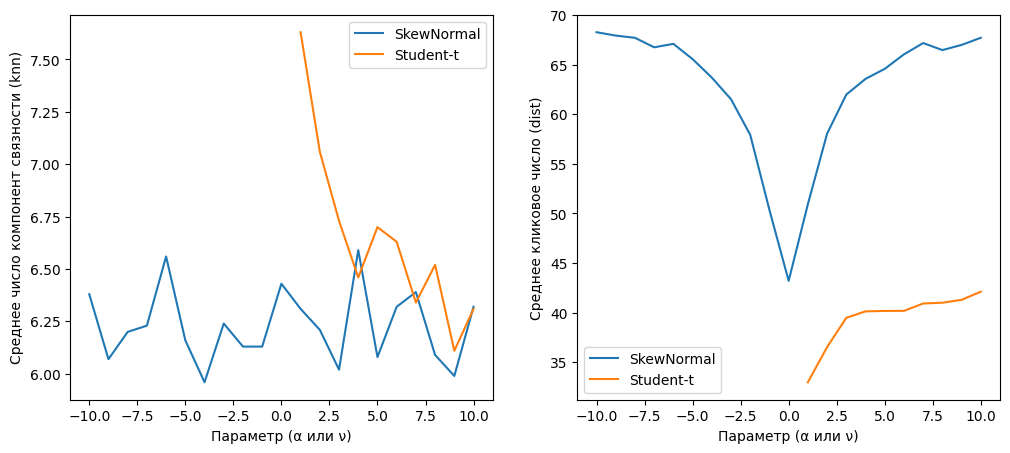

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, Cknn_skew, label="SkewNormal")
plt.plot(nu_values, Cknn_student, label="Student-t")
plt.xlabel("Параметр (α или ν)")
plt.ylabel("Среднее число компонент связности (knn)")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(alpha_values, Tdist_skew, label="SkewNormal")
plt.plot(nu_values, Tdist_student, label="Student-t")
plt.xlabel("Параметр (α или ν)")
plt.ylabel("Среднее кликовое число (dist)")
plt.legend()
plt.savefig("part1_results.png")
plt.show()

1. В knn графе параметр α не сильно влияет на число компонент связности
2. В knn графе параметр ν чем больше - тем меньше компонент связности в графе
3. В dist графе чем ближе параметр α к нулю, тем меньше кликовое число, чем дальше от нуля тем больше
4. в dist графе чем больше ν тем больше число кликовое число

# Часть 2: Зависимость от n и k/d

In [11]:
n_values = np.arange(10, 200, 10)
k_values = np.arange(1, 20)
d_values = np.arange(0.1, 3.1, 0.2)

In [17]:
Tknn_skew_n = []
Tknn_student_n = []
Tdist_skew_n = []
Tdist_student_n = []
for n_var in tqdm(n_values, position=0):
    Tknn_sum_skew = Tknn_sum_student = Tdist_sum_skew = Tdist_sum_student = 0
    for _ in tqdm(range(M), position=1, leave=False):
        data_skew = generate_skewnormal(n_var, alpha_0)
        data_student = generate_student_t(n_var, nu_0)
        G_knn_skew = build_knn_graph(data_skew, k)
        G_knn_student = build_knn_graph(data_student, k)
        G_dist_skew = build_distance_graph(data_skew, d)
        G_dist_student = build_distance_graph(data_student, d)
        Tknn_sum_skew += compute_number_of_components(G_knn_skew)
        Tknn_sum_student += compute_number_of_components(G_knn_student)
        Tdist_sum_skew += clique_number(G_dist_skew)
        Tdist_sum_student += clique_number(G_dist_student)
    Tknn_skew_n.append(Tknn_sum_skew / M)
    Tknn_student_n.append(Tknn_sum_student / M)
    Tdist_skew_n.append(Tdist_sum_skew / M)
    Tdist_student_n.append(Tdist_sum_student / M)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
Tknn_skew_k = []
Tknn_student_k = []
for k_var in tqdm(k_values, position=0):
    Tknn_sum_skew = Tknn_sum_student = 0
    for _ in tqdm(range(M), position=1, leave=False):
        data_skew = generate_skewnormal(n, alpha_0)
        data_student = generate_student_t(n, nu_0)
        G_knn_skew = build_knn_graph(data_skew, k_var)
        G_knn_student = build_knn_graph(data_student, k_var)
        Tknn_sum_skew += compute_number_of_components(G_knn_skew)
        Tknn_sum_student += compute_number_of_components(G_knn_student)
    Tknn_skew_k.append(Tknn_sum_skew / M)
    Tknn_student_k.append(Tknn_sum_student / M)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
Tdist_skew_d = []
Tdist_student_d = []
for d_var in tqdm(d_values, position=0):
    Tdist_sum_skew = Tdist_sum_student = 0
    for _ in tqdm(range(M), position=1, leave=False):
        data_skew = generate_skewnormal(n, alpha_0)
        data_student = generate_student_t(n, nu_0)
        G_dist_skew = build_distance_graph(data_skew, d_var)
        G_dist_student = build_distance_graph(data_student, d_var)
        Tdist_sum_skew += clique_number(G_dist_skew)
        Tdist_sum_student += clique_number(G_dist_student)
    Tdist_skew_d.append(Tdist_sum_skew / M)
    Tdist_student_d.append(Tdist_sum_student / M)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

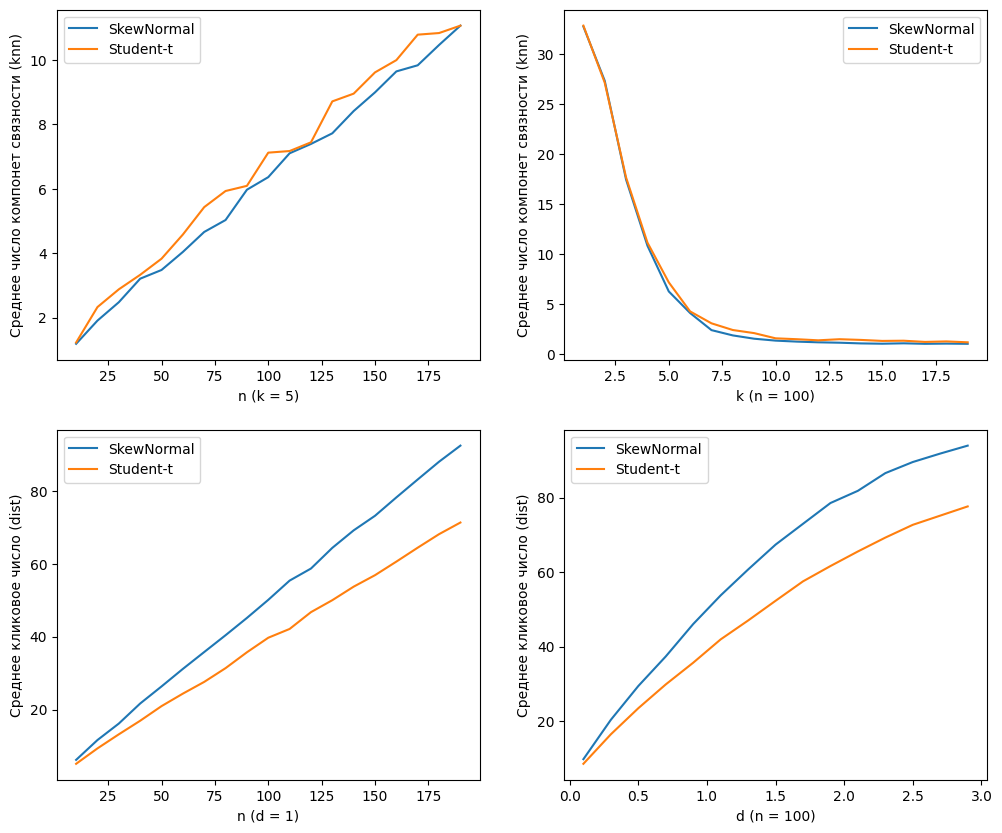

In [25]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(n_values, Tknn_skew_n, label="SkewNormal")
plt.plot(n_values, Tknn_student_n, label="Student-t")
plt.xlabel("n (k = 5)")
plt.ylabel("Среднее число компонет связности (knn)")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(k_values, Tknn_skew_k, label="SkewNormal")
plt.plot(k_values, Tknn_student_k, label="Student-t")
plt.xlabel("k (n = 100)")
plt.ylabel("Среднее число компонет связности (knn)")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(n_values, Tdist_skew_n, label="SkewNormal")
plt.plot(n_values, Tdist_student_n, label="Student-t")
plt.xlabel("n (d = 1)")
plt.ylabel("Среднее кликовое число (dist)")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(d_values, Tdist_skew_d, label="SkewNormal")
plt.plot(d_values, Tdist_student_d, label="Student-t")
plt.xlabel("d (n = 100)")
plt.ylabel("Среднее кликовое число (dist)")
plt.legend()
plt.savefig("part2_results.png")

Для dist различия в числовых характеристиках при различных параметрах графа более ощутимы чем для knn графа

# Часть 3: Построение множества A и оценка мощности

In [23]:
Tknn_H0 = []
Tknn_H1 = []
Tdist_H0 = []
Tdist_H1 = []

for _ in tqdm(range(M_large)):
    data_skew = generate_skewnormal(n, alpha_0)
    data_student = generate_student_t(n, nu_0)
    G_knn_skew = build_knn_graph(data_skew, k)
    G_knn_student = build_knn_graph(data_student, k)
    G_dist_skew = build_distance_graph(data_skew, d)
    G_dist_student = build_distance_graph(data_student, d)
    Tknn_H0.append(compute_number_of_components(G_knn_skew))
    Tknn_H1.append(compute_number_of_components(G_knn_student))
    Tdist_H0.append(clique_number(G_dist_skew))
    Tdist_H1.append(clique_number(G_dist_student))

  0%|          | 0/5000 [00:00<?, ?it/s]

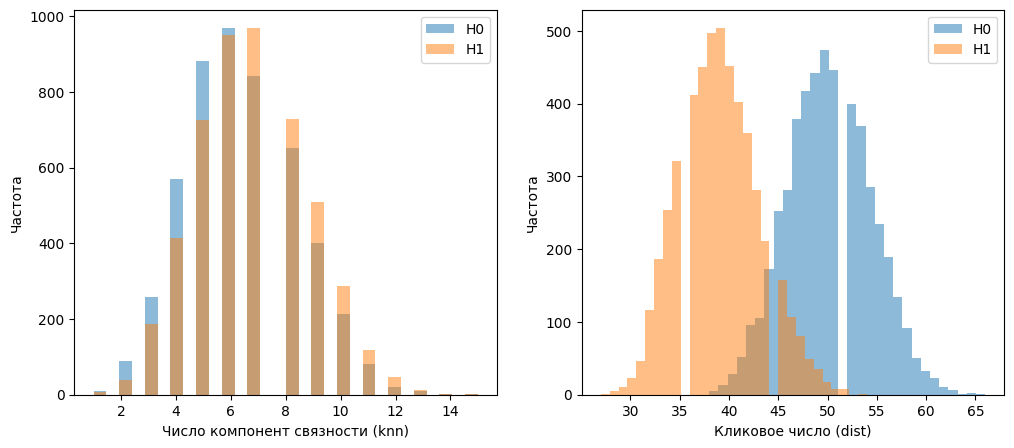

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(Tknn_H0, bins=30, alpha=0.5, label="H0")
plt.hist(Tknn_H1, bins=30, alpha=0.5, label="H1")
plt.xlabel("Число компонент связности (knn)")
plt.ylabel("Частота")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(Tdist_H0, bins=30, alpha=0.5, label="H0")
plt.hist(Tdist_H1, bins=30, alpha=0.5, label="H1")
plt.xlabel("Кликовое число (dist)")
plt.ylabel("Частота")
plt.legend()
plt.savefig("part3_results_0.png")
plt.show()

Визуально по графику видно, что числовые характеристики dist графа лучше разделяются в зависимости от порождающего граф распределения

In [27]:
from collections import Counter

# Функция для построения множества A и оценки мощности критерия
def build_criterion(T_H0, T_H1, alpha=0.05):
    # Построение эмпирических распределений
    count_H0 = Counter(T_H0)
    count_H1 = Counter(T_H1)
    total_H0 = len(T_H0)
    total_H1 = len(T_H1)

    prob_H0 = {t: count / total_H0 for t, count in count_H0.items()}
    prob_H1 = {t: count / total_H1 for t, count in count_H1.items()}
    #print('PH0', prob_H0)
    #print('PH1' ,prob_H1)

    # Все уникальные значения характеристики
    all_values = set(prob_H0.keys()) | set(prob_H1.keys())

    # Расчет отношения правдоподобия для каждого значения
    likelihood_ratio = {}
    for t in all_values:
        if prob_H0.get(t, 0) > 0:
            likelihood_ratio[t] = prob_H1.get(t, 0) / prob_H0[t]
        else:
            likelihood_ratio[t] = float("inf")

    # Сортировка значений по убыванию отношения правдоподобия
    sorted_values = sorted(all_values, key=lambda t: likelihood_ratio[t], reverse=True)

    # Построение множества A_complement (значения, при которых принимаем H1)
    A_complement = []
    type1_error = 0

    for t in sorted_values:
        if type1_error + prob_H0.get(t, 0) <= alpha:
            A_complement.append(t)
            type1_error += prob_H0.get(t, 0)
        else:
            break

    # Множество A (значения, при которых принимаем H0)
    A = set(all_values) - set(A_complement)

    # Оценка мощности критерия
    power = sum(prob_H1.get(t, 0) for t in A_complement)

    return A, A_complement, type1_error, power


A_knn, A_complement_knn, type1_error_knn, power_knn = build_criterion(Tknn_H0, Tknn_H1)

A_dist, A_complement_dist, type1_error_dist, power_dist = build_criterion(Tdist_H0, Tdist_H1)

# Вывод результатов
print("Результаты для KNN-графа (количество компонент связности):")
print(f"Множество A (принимаем H0): {A_knn}")
print(f"Множество A_complement (принимаем H1): {A_complement_knn}")
print(f"Вероятность ошибки первого рода: {type1_error_knn:.4f}")
print(f"Мощность критерия: {power_knn:.4f}")

print("\nРезультаты для дистанционного графа (кликовое число):")
print(f"Множество A (принимаем H0): {A_dist}")
print(f"Множество A_complement (принимаем H1): {A_complement_dist}")
print(f"Вероятность ошибки первого рода: {type1_error_dist:.4f}")
print(f"Мощность критерия: {power_dist:.4f}")

Результаты для KNN-графа (количество компонент связности):
Множество A (принимаем H0): {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15}
Множество A_complement (принимаем H1): [12, 14, 11]
Вероятность ошибки первого рода: 0.0206
Мощность критерия: 0.0338

Результаты для дистанционного графа (кликовое число):
Множество A (принимаем H0): {43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}
Множество A_complement (принимаем H1): [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Вероятность ошибки первого рода: 0.0392
Мощность критерия: 0.8082


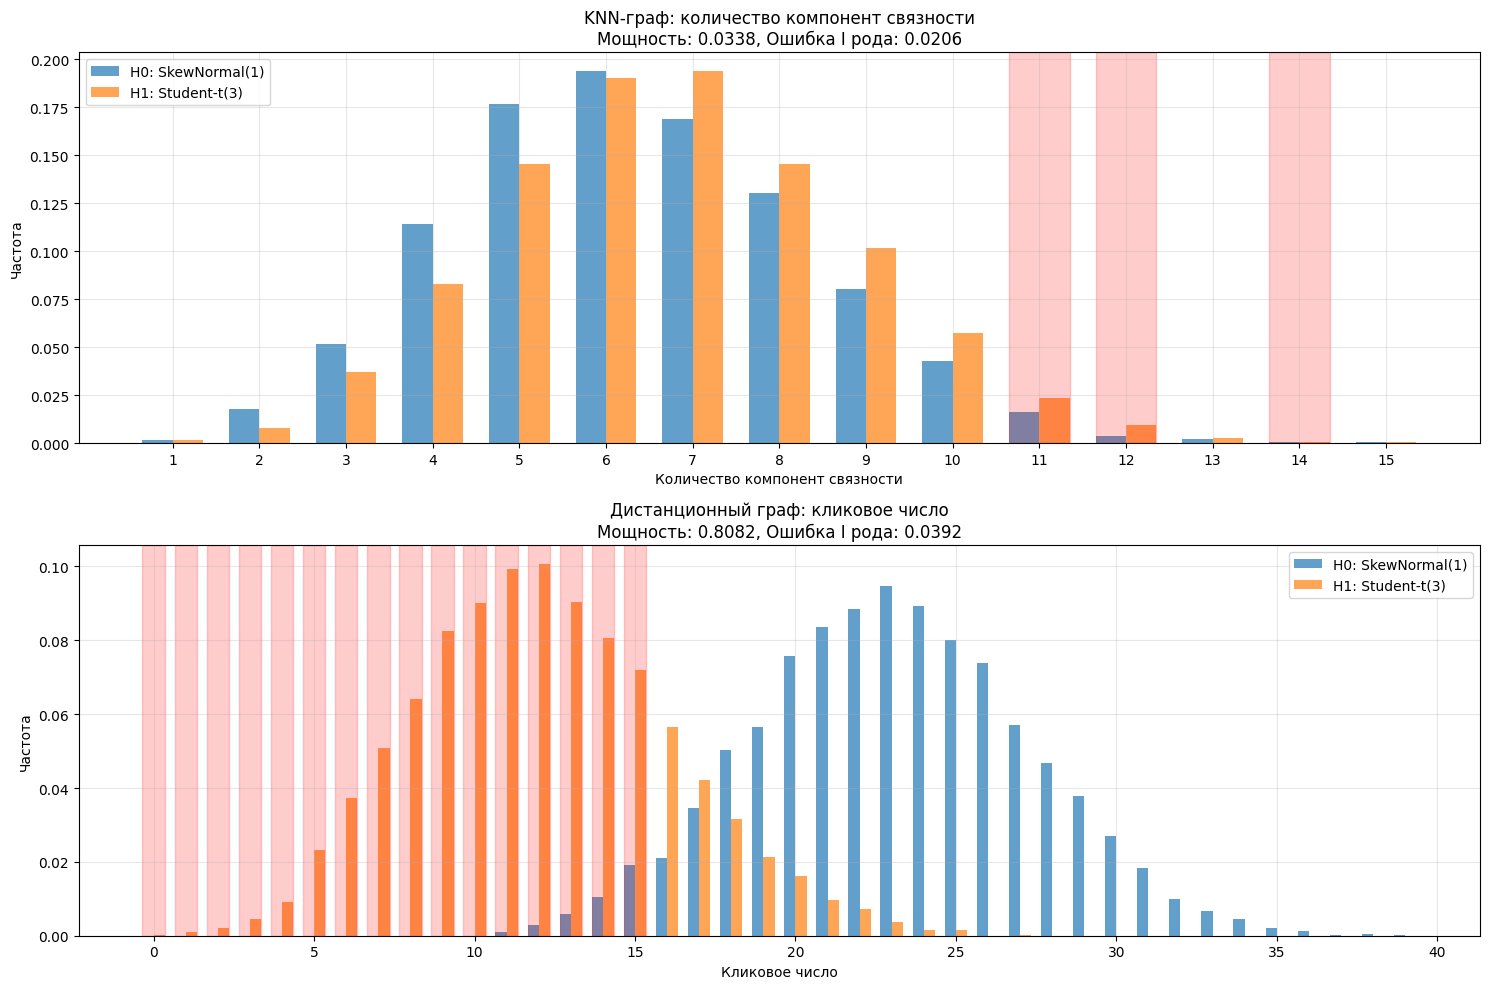

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))

# KNN-граф
plt.subplot(2, 1, 1)
all_values_knn = sorted(list(set(Tknn_H0) | set(Tknn_H1)))
width = 0.35

# Вычисляем частоты для каждого значения
counts_H0_knn = Counter(Tknn_H0)
counts_H1_knn = Counter(Tknn_H1)
freq_H0_knn = [counts_H0_knn.get(val, 0) / len(Tknn_H0) for val in all_values_knn]
freq_H1_knn = [counts_H1_knn.get(val, 0) / len(Tknn_H1) for val in all_values_knn]

idx = np.arange(len(all_values_knn))
plt.bar(idx - width / 2, freq_H0_knn, width, alpha=0.7, label="H0: SkewNormal(1)")
plt.bar(idx + width / 2, freq_H1_knn, width, alpha=0.7, label="H1: Student-t(3)")

# Отмечаем критическую область
for i, val in enumerate(all_values_knn):
    if val in A_complement_knn:
        plt.axvspan(i - width, i + width, alpha=0.2, color="red")

plt.xticks(idx, all_values_knn)
plt.legend()
plt.title(f"KNN-граф: количество компонент связности\nМощность: {power_knn:.4f}, Ошибка I рода: {type1_error_knn:.4f}")
plt.xlabel("Количество компонент связности")
plt.ylabel("Частота")
plt.grid(alpha=0.3)

# Дистанционный граф
plt.subplot(2, 1, 2)
all_values_dist = sorted(list(set(Tdist_H0) | set(Tdist_H1)))
counts_H0_dist = Counter(Tdist_H0)
counts_H1_dist = Counter(Tdist_H1)
freq_H0_dist = [counts_H0_dist.get(val, 0) / len(Tdist_H0) for val in all_values_dist]
freq_H1_dist = [counts_H1_dist.get(val, 0) / len(Tdist_H1) for val in all_values_dist]

idx = np.arange(len(all_values_dist))
plt.bar(idx - width / 2, freq_H0_dist, width, alpha=0.7, label="H0: SkewNormal(1)")
plt.bar(idx + width / 2, freq_H1_dist, width, alpha=0.7, label="H1: Student-t(3)")

# Отмечаем критическую область (красным фоном)
for i, val in enumerate(all_values_dist):
    if val in A_complement_dist:
        plt.axvspan(i - width, i + width, alpha=0.2, color="red")

plt.legend()
plt.title(f"Дистанционный граф: кликовое число\nМощность: {power_dist:.4f}, Ошибка I рода: {type1_error_dist:.4f}")
plt.xlabel("Кликовое число")
plt.ylabel("Частота")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("part3_results_1.png")
plt.show()